In [22]:
# Imports
import pandas as pd
import numpy
import json
import matplotlib.pyplot as plt
%matplotlib notebook

In [97]:
# Load data
with open('parameters_tests.json', 'r') as f:
    p = json.load(f)
with open('sklearn_comparison.json', 'r') as f:
    s = json.load(f)
    for scores in s.values():
        del scores['rec']
print(json.dumps(s, indent=4))

{
    "forest_bootstrap": {
        "acc": 0.7002314814814815,
        "prec": 0.4906898362482853
    },
    "forest_undersampling": {
        "acc": 0.478587962962963,
        "prec": 0.8071555153819926
    },
    "forest_oversampling": {
        "acc": 0.44155092592592593,
        "prec": 0.7280982835878231
    },
    "sklearn_bootstrap": {
        "acc": 0.7002314814814815,
        "prec": 0.4906898362482853
    },
    "sklearn_balanced": {
        "acc": 0.605324074074074,
        "prec": 0.7658983849966536
    }
}


<IPython.core.display.Javascript object>


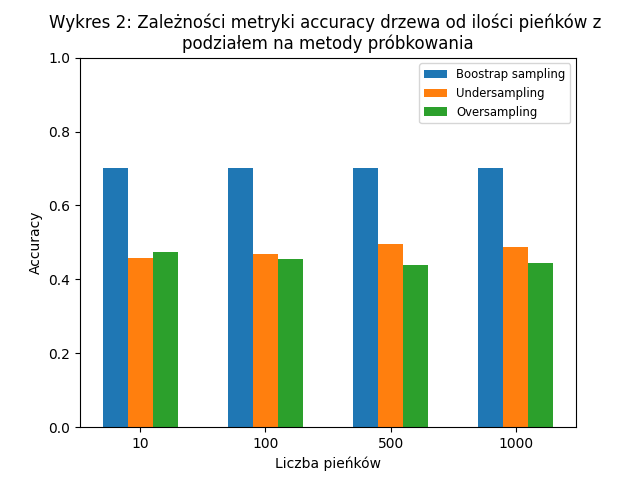

In [102]:
fig = plt.figure()

width=0.2
x = numpy.array(range(4))
labels =  list(p['forest_bootstrap']['stumps'].keys())

ax = plt.subplot()
ax.bar(x, p['forest_bootstrap']['stumps'].values(), align='center', width=width, label='Boostrap sampling')
ax.bar(x + width, p['forest_undersampling']['stumps'].values(), align='center', width=width, label='Undersampling')
ax.bar(x + 2 * width, p['forest_oversampling']['stumps'].values(), align='center', width=width, label='Oversampling')

ax.set_xticks(x + width)
ax.set_xticklabels(labels)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Liczba pieńków')
ax.set_title('Wykres 2: Zależności metryki accuracy drzewa od ilości pieńków z \npodziałem na metody próbkowania')
ax.set_ylim(0,1)
ax.legend()

plt.legend(fontsize='small')
plt.show()
plt.savefig('plot1.jpeg')

<IPython.core.display.Javascript object>


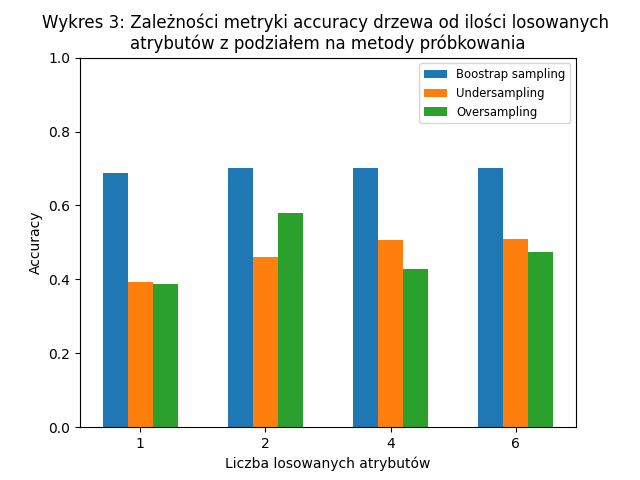

In [103]:
fig = plt.figure()

width=0.2
x = numpy.array(range(4))
labels =  list(p['forest_bootstrap']['features'].keys())

ax = plt.subplot()
ax.bar(x, p['forest_bootstrap']['features'].values(), align='center', width=width, label='Boostrap sampling')
ax.bar(x + width, p['forest_undersampling']['features'].values(), align='center', width=width, label='Undersampling')
ax.bar(x + 2 * width, p['forest_oversampling']['features'].values(), align='center', width=width, label='Oversampling')

ax.set_xticks(x + width)
ax.set_xticklabels(labels)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Liczba losowanych atrybutów')
ax.set_title('Wykres 3: Zależności metryki accuracy drzewa od ilości losowanych \natrybutów z podziałem na metody próbkowania')
ax.set_ylim(0,1)
ax.legend()

plt.legend(fontsize='small')
plt.show()
plt.savefig('plot2.jpeg')

<IPython.core.display.Javascript object>


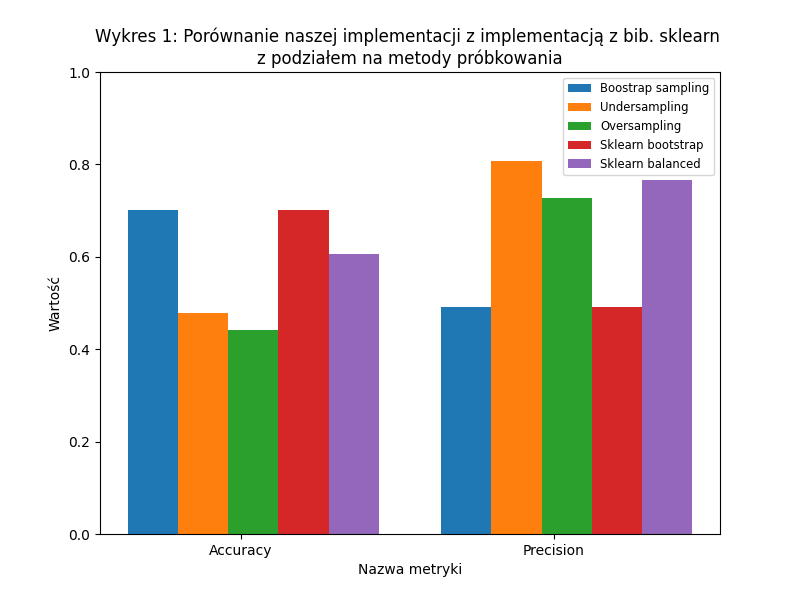

In [104]:
fig = plt.figure(figsize=(8, 6))

width=0.2
x = numpy.array([1.25*i for i in range(2)])
labels =  ['Accuracy', 'Precision']

ax = plt.subplot()
ax.bar(x, s['forest_bootstrap'].values(), align='center', width=width, label='Boostrap sampling')
ax.bar(x + width, s['forest_undersampling'].values(), align='center', width=width, label='Undersampling')
ax.bar(x + 2 * width, s['forest_oversampling'].values(), align='center', width=width, label='Oversampling')
ax.bar(x + 3 * width, s['sklearn_bootstrap'].values(), align='center', width=width, label='Sklearn bootstrap')
ax.bar(x + 4 * width, s['sklearn_balanced'].values(), align='center', width=width, label='Sklearn balanced')

ax.set_xticks(x + width + width/2 + width/4)
ax.set_xticklabels(labels)

ax.set_ylabel('Wartość')
ax.set_xlabel('Nazwa metryki')
ax.set_title('Wykres 1: Porównanie naszej implementacji z implementacją z bib. sklearn \nz podziałem na metody próbkowania')
ax.set_ylim(0,1)
ax.legend()

plt.legend(fontsize='small')
plt.show()
#plt.savefig('plot3.jpeg')